<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/ch10_21801073.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Load Data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx', sheet_name='Online Retail')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

#### - Negative Quantity

In [ ]:
df.loc[df['Quantity'] <= 0].shape

(10624, 8)

In [ ]:
df.shape

(541909, 8)

In [ ]:
# Quantity(수량)이 0보다 작은 row들이 있으므로 데이터프레임에서 삭제
df = df.loc[df['Quantity'] > 0]

In [ ]:
df.shape

(531285, 8)

#### - Missing CustomerID

  (3) 칼럼별 결측값 개수 구하기 : df.isnull().sum()

In [ ]:
pd.isnull(df['CustomerID']).sum()

133361

In [ ]:
pd.isnull(df['CustomerID'])

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: CustomerID, Length: 531285, dtype: bool

In [ ]:
df = df[pd.notnull(df['CustomerID'])]

In [ ]:
df.shape

(397924, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### - Excluding Incomplete Month

In [ ]:
print('Date Range: %s ~ %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [ ]:
df.loc[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [ ]:
df.shape

(397924, 8)

In [ ]:
# 2011년 12월 이후의 row들은 삭제
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df.shape

(380620, 8)

#### - Total Sales

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

<ipython-input-19-b3761472ad58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity'] * df['UnitPrice']


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### - Per Customer Data

In [ ]:
# customer_df라는 데이터프레임에 customerid별로 그룹지어 customerid마다의 전체 매출과 고유한 invoiceno들을 카운트하여 거래량을 저장.
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})

# 컬럼명을 새로 지정.
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']

In [ ]:
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [ ]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,1952.818779,4.131689,400.255621
std,8354.913254,7.420253,1271.187289
min,0.000000,1.000000,0.000000
25%,304.305000,1.000000,178.602500
50%,657.265000,2.000000,295.033958
75%,1599.515000,4.000000,431.594250
max,268478.000000,201.000000,77183.600000


In [ ]:
rank_df = customer_df.rank(method='first')

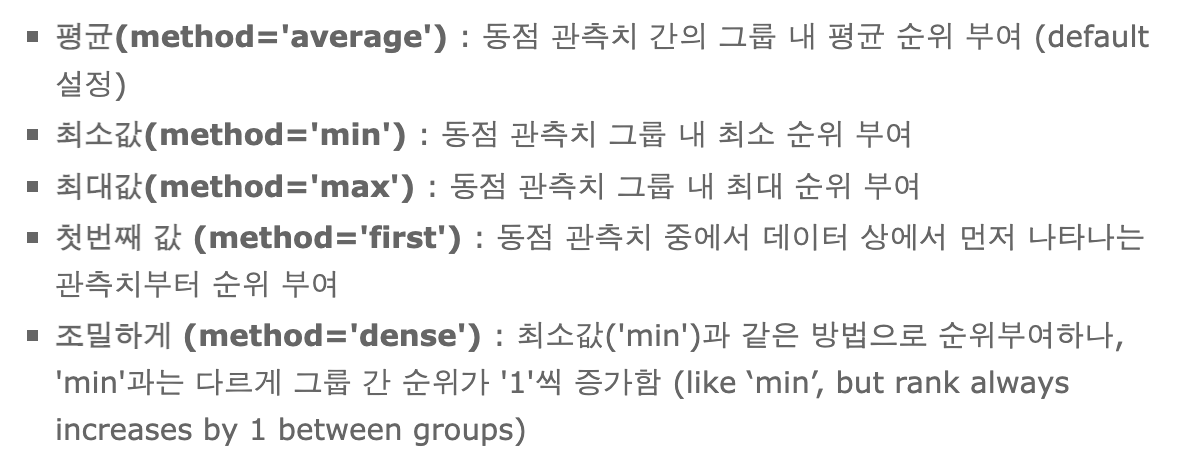

In [ ]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [ ]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4298.000000
mean,2149.500000,2149.500000,2149.500000
std,1240.870058,1240.870058,1240.870058
min,1.000000,1.000000,1.000000
25%,1075.250000,1075.250000,1075.250000
50%,2149.500000,2149.500000,2149.500000
75%,3223.750000,3223.750000,3223.750000
max,4298.000000,4298.000000,4298.000000


In [ ]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std() # 표준화

In [ ]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [ ]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


# 3. Customer Segmentation via K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

#### - K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [ ]:
kmeans

KMeans(n_clusters=4)

In [ ]:
kmeans.labels_

array([0, 3, 3, ..., 2, 1, 3], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[-0.13138479, -0.84695041,  0.79706113],
       [ 0.24788176,  0.74471922, -0.64096138],
       [-1.23086227, -0.78187952, -1.05204326],
       [ 1.2056827 ,  1.00214594,  0.87618557]])

In [ ]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,3
12348.0,0.967466,0.573388,0.929590,3
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0


In [ ]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1066
1     935
2    1171
3    1126
Name: TotalSales, dtype: int64

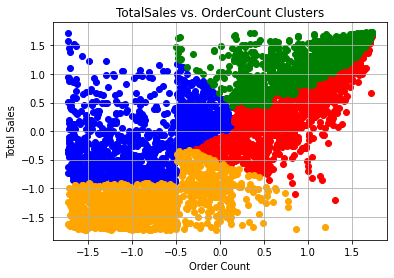

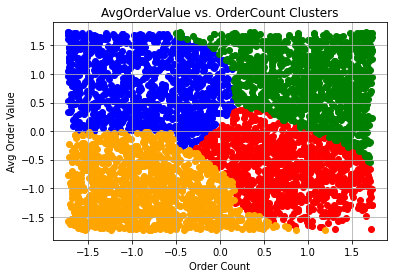

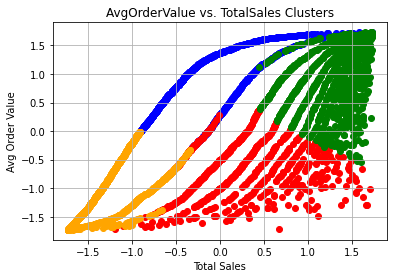

In [ ]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

### **first plot: order count vs. total sales**

cluster green: low-value customers who have not purchased our product so much

cluster red: group of high-value customers who have purchased the greatest amount and frequently

### **second plot: order count vs. average order value / third plot: total sales vs. average order value**

cluster green: the lowest average per-order value and the lowest number of orders

cluster red: the highest average per-order value and the greatest number of orders


#### - Selecting the best number of clusters

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
for n_cluster in [4,5,6,7,8]:
  kmeans = KMeans(n_clusters=n_cluster).fit(
      normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
  )
  silhouette_avg = silhouette_score(
      normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']],
      kmeans.labels_
  )

  print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4114
Silhouette Score for 5 Clusters: 0.3771
Silhouette Score for 6 Clusters: 0.3785
Silhouette Score for 7 Clusters: 0.3907
Silhouette Score for 8 Clusters: 0.3812


### Silhouette coefficient: a metric used to calculate the goodness of a clustering technique

help to make decisions on what the best number of clusters will be for the segmenting problem 

it measures how close the data points are to their clusters compared to other clusters

https://ariz1623.tistory.com/224

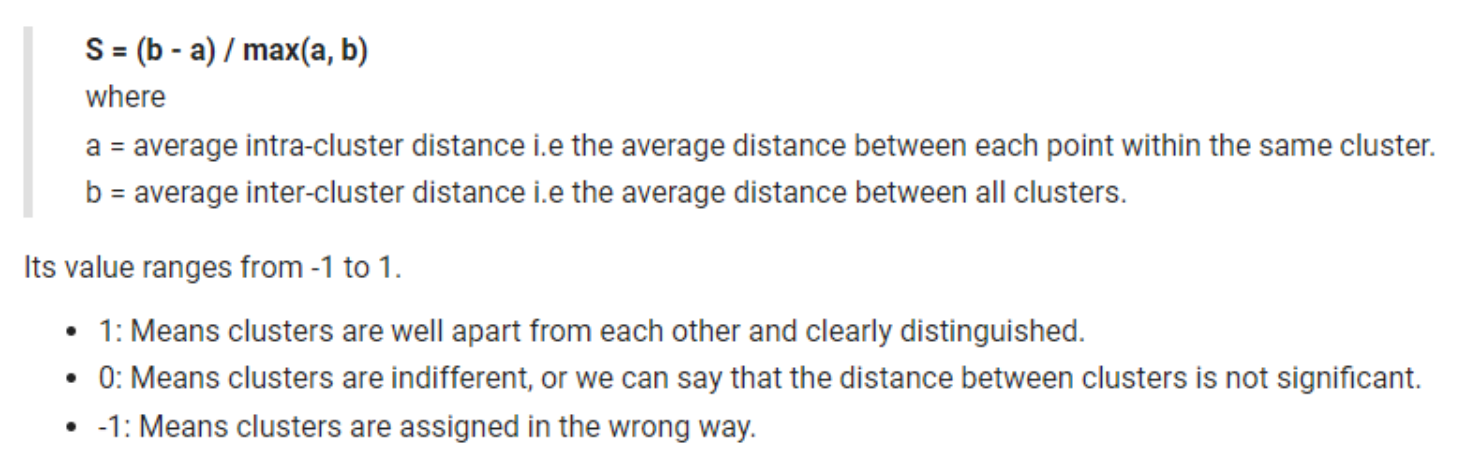

#### - Interpreting Customer Segments

In [ ]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)

In [ ]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [ ]:
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,1
12347.0,1.457445,1.064173,1.401033,3
12348.0,0.967466,0.573388,0.929590,3
12349.0,0.944096,-1.730641,1.683093,1
12350.0,-0.732148,-1.729835,0.331622,1
12352.0,1.193114,1.309162,0.169639,3
12353.0,-1.636352,-1.729029,-1.570269,2
12354.0,0.508917,-1.728223,1.612981,1
12355.0,-0.386422,-1.727417,0.970690,1


In [ ]:
print('total sales / order count / avg order value')
kmeans.cluster_centers_

total sales / order count / avg order value


array([[ 0.2398247 ,  0.73627539, -0.64135962],
       [-0.14398196, -0.85414751,  0.78536565],
       [-1.24000465, -0.78734069, -1.06099571],
       [ 1.20190252,  0.99212432,  0.88087794]])

total sales / order count / avg order value

- 4th cluster: highest value in all three attributes
- 2nd cluster: lowest value in all three attributes
- 3rd cluster: contribution to revenue and number of orders are medium to low, but high-value items
- 1st cluster: purchases relatively frequently low-value items

In [ ]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3] # cluster value should be based on the above result
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12347.0,1.457445,1.064173,1.401033,3
12348.0,0.967466,0.573388,0.929590,3
12352.0,1.193114,1.309162,0.169639,3
12356.0,1.268868,0.158357,1.557375,3
12359.0,1.585581,0.574194,1.672617,3


In [ ]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,1131.000000,1131.000000,1131.000000
mean,5622.776314,8.445623,619.484437
std,15486.090985,10.521508,767.036003
min,1000.160000,1.000000,215.450606
25%,1762.505000,4.000000,357.562333
50%,2726.770000,6.000000,444.445000
75%,4486.700000,10.000000,622.616296
max,268478.000000,192.000000,14844.766667


In [ ]:
pd.DataFrame(
    df.loc[df['CustomerID']
           .isin(high_value_cluster.index)]
           .groupby('Description')
           .count()['StockCode']
           .sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1129
REGENCY CAKESTAND 3 TIER,1082
WHITE HANGING HEART T-LIGHT HOLDER,1062
LUNCH BAG RED RETROSPOT,924
PARTY BUNTING,859


In [ ]:
pd.DataFrame(
    df.loc[df['CustomerID']
           .isin(four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index)]
           .groupby('Description')
           .count()['StockCode']
           .sort_values(ascending=False).head()
)

,StockCode
Description,
JUMBO BAG RED RETROSPOT,1129
REGENCY CAKESTAND 3 TIER,1082
WHITE HANGING HEART T-LIGHT HOLDER,1062
LUNCH BAG RED RETROSPOT,924
PARTY BUNTING,859
